In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib widget

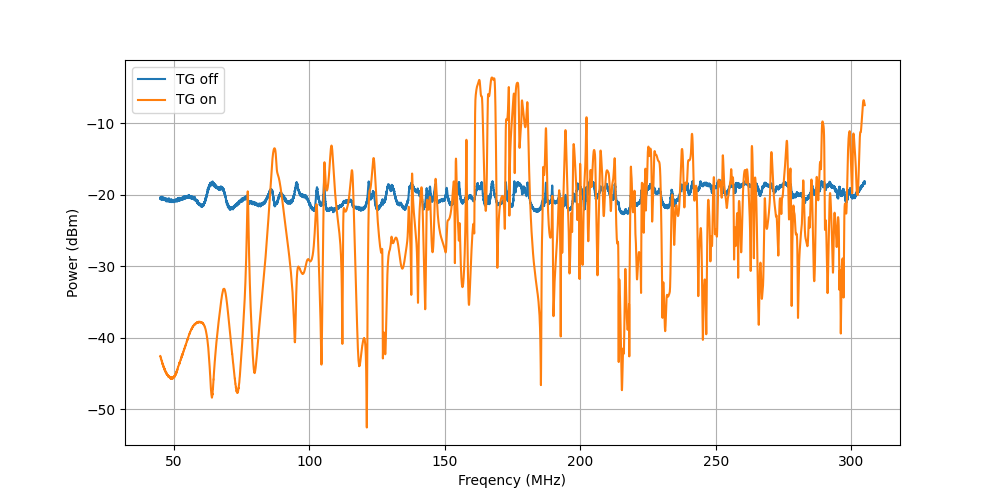

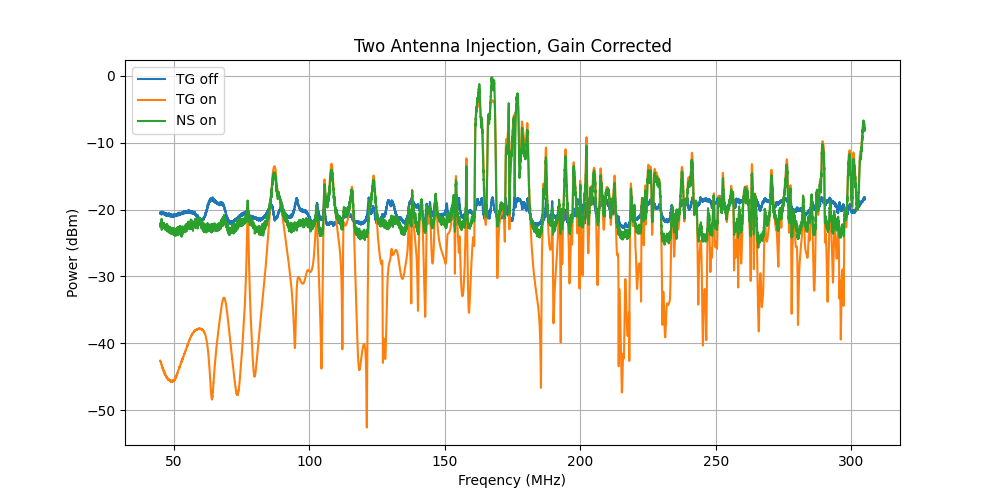

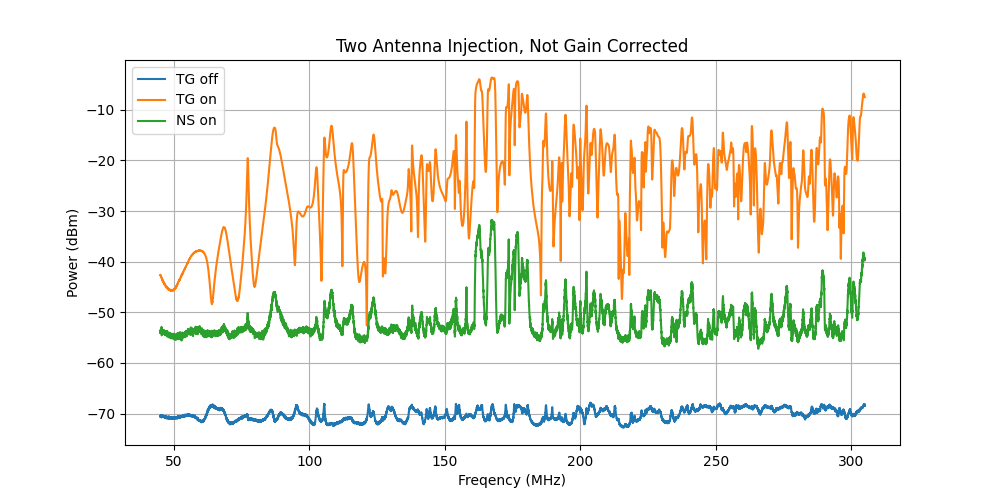

In [3]:
freqs   = np.load('data/TG_off_RBW10k_10dBatt_8_9_23.npy')[:, 0] 
TG_off  = np.load('data/TG_off_RBW10k_10dBatt_8_9_23.npy')[:, 1] 
TG_on   = np.load('data/TG_on_n40_12dbAtt_RBW10k_10dBatt_8_9_23.npy')[:, 1] 
NS_on   = np.load('data/siglentNoiseSoruce_on_n542mv_0dbAtt_RBW10k_10dBatt_8_9_23.npy')[:, 1] 

freqs = np.linspace(45,305,10000)

plt.close('all')
plt.figure(figsize=(10,5))
plt.plot(freqs, TG_off+50, label = 'TG off')
plt.plot(freqs, TG_on, label = 'TG on')
#plt.plot(freqs, NS_on+32, label = 'NS on+32')
plt.legend()
plt.xlabel('Freqency (MHz)')
plt.ylabel('Power (dBm)')
plt.grid()
plt.show()

plt.figure(figsize=(10,5))
plt.title('Two Antenna Injection, Gain Corrected')
plt.plot(freqs, TG_off+50, label = 'TG off')
plt.plot(freqs, TG_on, label = 'TG on')
plt.plot(freqs, NS_on+31.5, label = 'NS on')
plt.legend()
plt.xlabel('Freqency (MHz)')
plt.ylabel('Power (dBm)')
plt.grid()
plt.show()

plt.figure(figsize=(10,5))
plt.title('Two Antenna Injection, Not Gain Corrected')
plt.plot(freqs, TG_off, label = 'TG off')
plt.plot(freqs, TG_on, label = 'TG on')
plt.plot(freqs, NS_on, label = 'NS on')
plt.legend()
plt.xlabel('Freqency (MHz)')
plt.ylabel('Power (dBm)')
plt.grid()
plt.show()

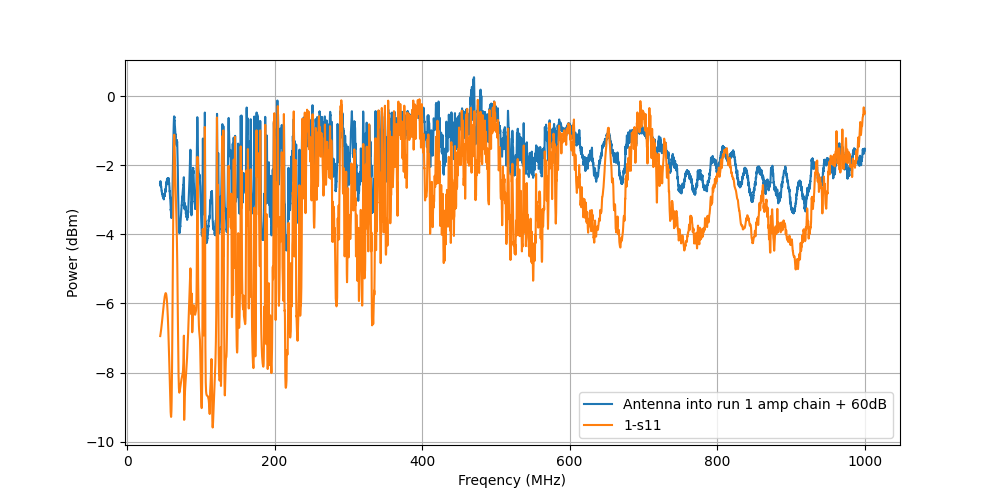

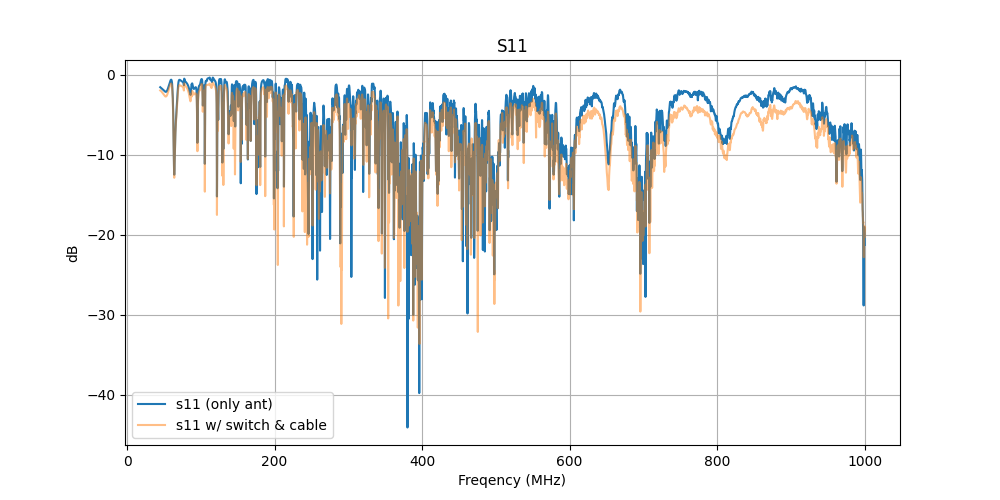

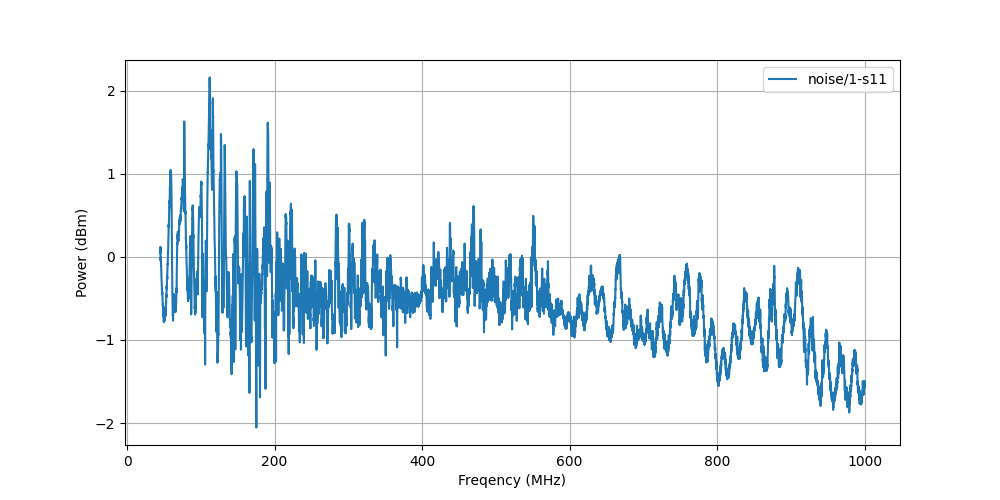

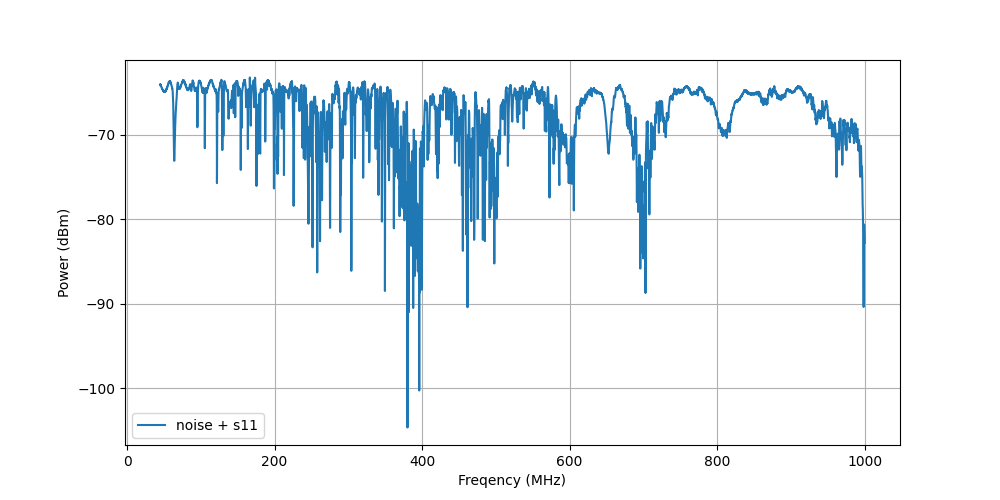

In [4]:
#1GHz span with s11 data

#freqs           = np.load('data/TG_off_RBW100k_freq45_1005MHz_8_10_23.npy')[:, 0]/1e6
TG_off          = np.load('data/TG_off_RBW100k_freq45_1005MHz_8_10_23.npy')[:, 1] 
TG_on           = np.load('data/TG_on_n40dBm_60dBatt_RBW100k_freq45_1005MHz_8_10_23.npy')[:, 1] 
s11_df          = pd.read_csv('data/s11_8_11_23.csv')
s11_wCable_df   = pd.read_csv('data/s11_switchCableAndAnt_45_1100GHz_8_21_23.csv')

freqs = np.linspace(45,1000,10000)

s11_mag_interp = np.interp(freqs, s11_df['Frequency']/1e6, s11_df['S11_Magnitude'])
s11Cable_mag_interp = np.interp(freqs, s11_wCable_df['Frequency']/1e6, s11_wCable_df['S11_Magnitude'])

plt.close('all')
plt.figure(figsize=(10,5))
plt.plot(freqs, TG_off+60, label = 'Antenna into run 1 amp chain + 60dB')
#plt.plot(freqs, -s11_mag_interp, label = '1/s11')
plt.plot(freqs, 10*np.log10(1-(10**((s11Cable_mag_interp)/20))), label = '1-s11')
plt.legend()
plt.xlabel('Freqency (MHz)')
plt.ylabel('Power (dBm)')
plt.grid()
plt.show()


plt.figure(figsize=(10,5))
plt.title('S11')
plt.plot(freqs, s11_mag_interp, label = 's11 (only ant)')
plt.plot(freqs, s11Cable_mag_interp, label = 's11 w/ switch & cable', alpha = .5)
plt.legend()
plt.xlabel('Freqency (MHz)')
plt.ylabel('dB')
plt.grid()
plt.show()


plt.figure(figsize=(10,5))


plt.plot(freqs, TG_off+64 - (4+5*np.log10(1-10**((s11_mag_interp**1)/10))), label = 'noise/1-s11')
plt.legend()
plt.xlabel('Freqency (MHz)')
plt.ylabel('Power (dBm)')
plt.grid()
plt.show()


plt.figure(figsize=(10,5))
#plt.plot(freqs, TG_off + 60, label = 'noise')
#plt.plot(freqs, s11_mag_interp, label = 's11 mag')
plt.plot(freqs, (TG_off)+s11_mag_interp, label = 'noise + s11')
plt.legend()
plt.xlabel('Freqency (MHz)')
plt.ylabel('Power (dBm)')
plt.grid()
plt.show()

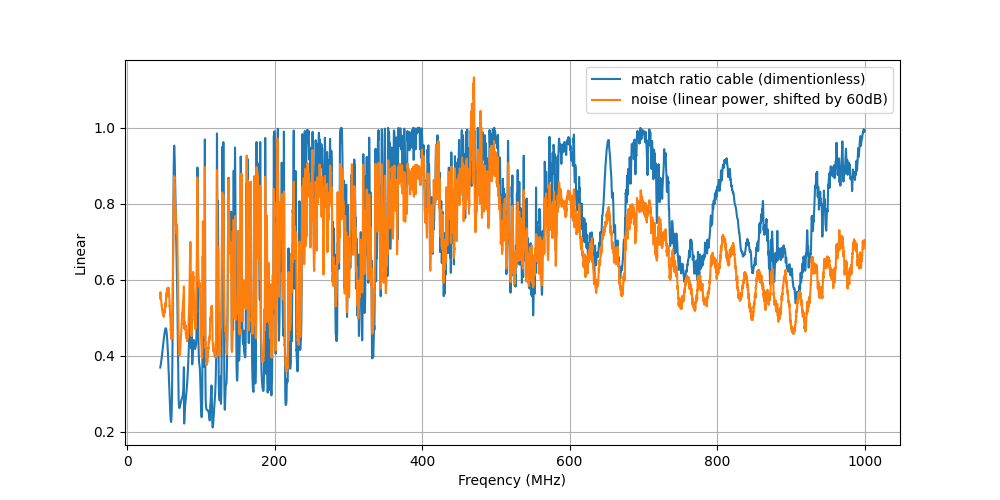

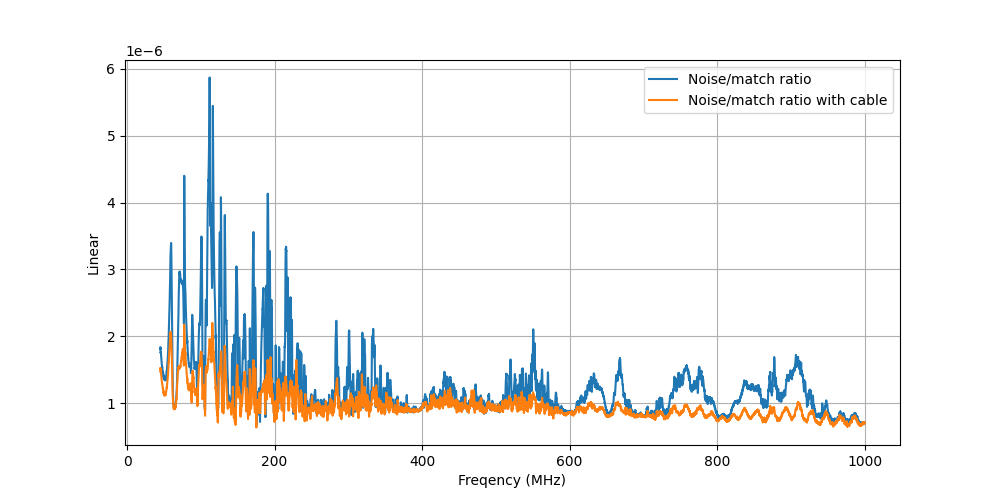

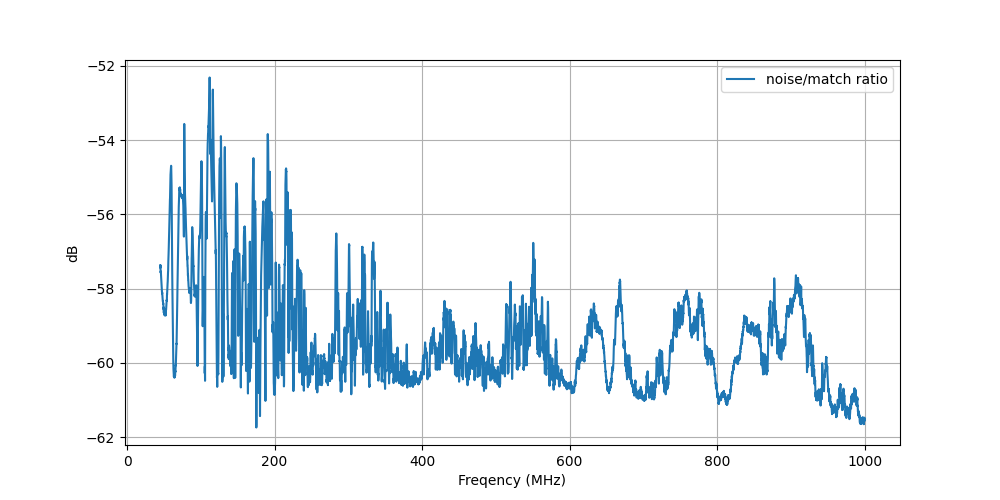

1.4041204355606735e-06
312.4267426742674


In [5]:
s11_ant_lin     = 10**(s11_mag_interp/20)
s11Cable_ant_lin= 10**(s11Cable_mag_interp/20)
#s11_ant_lin     = s11_mag_interp
s11_sys         = 0.01
M               = (1-s11_ant_lin**2)*(1-s11_sys**2)/(1-s11_ant_lin*s11_sys)**2
MCable          = (1-s11Cable_ant_lin**2)*(1-s11_sys**2)/(1-s11Cable_ant_lin*s11_sys)**2


plt.close('all')


plt.figure(figsize=(10,5))
#plt.plot(freqs,(M), label = 'match ratio (dimentionless)')
plt.plot(freqs,(MCable), label = 'match ratio cable (dimentionless)')
plt.plot(freqs, 10**(TG_off/10)*10**6.0, label = 'noise (linear power, shifted by 60dB)')
plt.legend()
plt.xlabel('Freqency (MHz)')
plt.ylabel('Linear')
plt.grid()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(freqs,10**(TG_off/10)/M, label = 'Noise/match ratio')
plt.plot(freqs,10**(TG_off/10)/MCable, label = 'Noise/match ratio with cable')
plt.legend()
plt.xlabel('Freqency (MHz)')
plt.ylabel('Linear')
plt.grid()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(freqs,10*np.log10(10**(TG_off/10)/M), label = 'noise/match ratio')
plt.legend()
plt.xlabel('Freqency (MHz)')
plt.ylabel('dB')
plt.grid()
plt.show()

print(np.median((10**(TG_off/10)/M)[0:2800]))
print(freqs[2800])

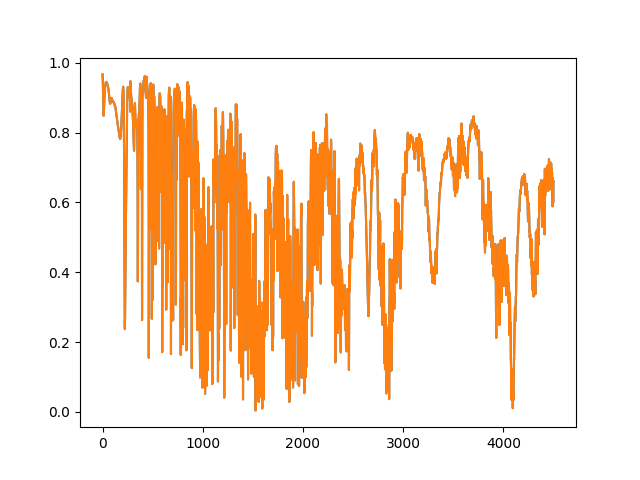

In [7]:
plt.figure()
plt.plot(s11_df['S11_Magnitude (linear)'])
plt.plot(10**(s11_df['S11_Magnitude']/20))
plt.show()


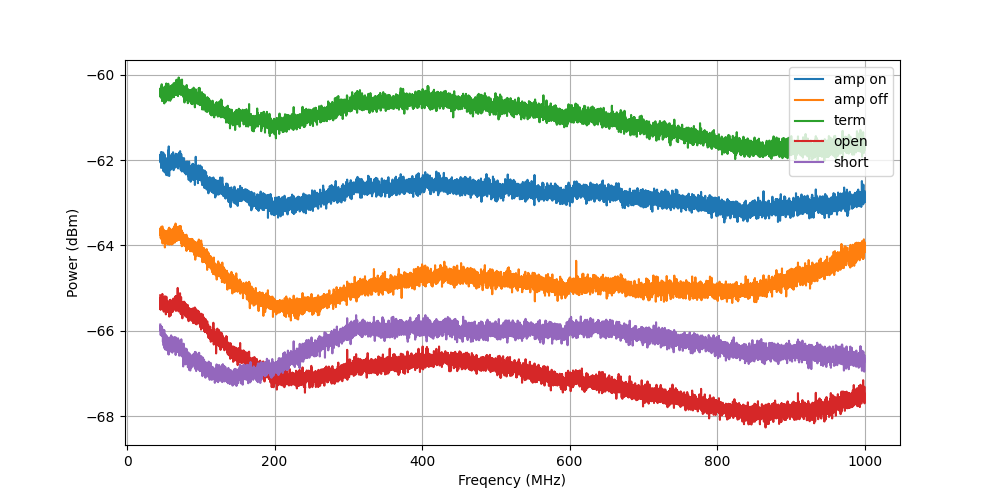

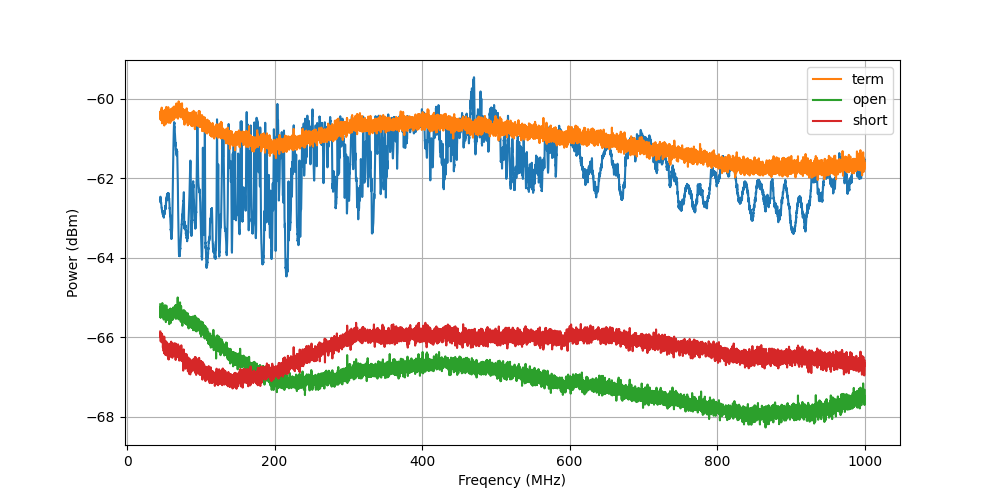

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


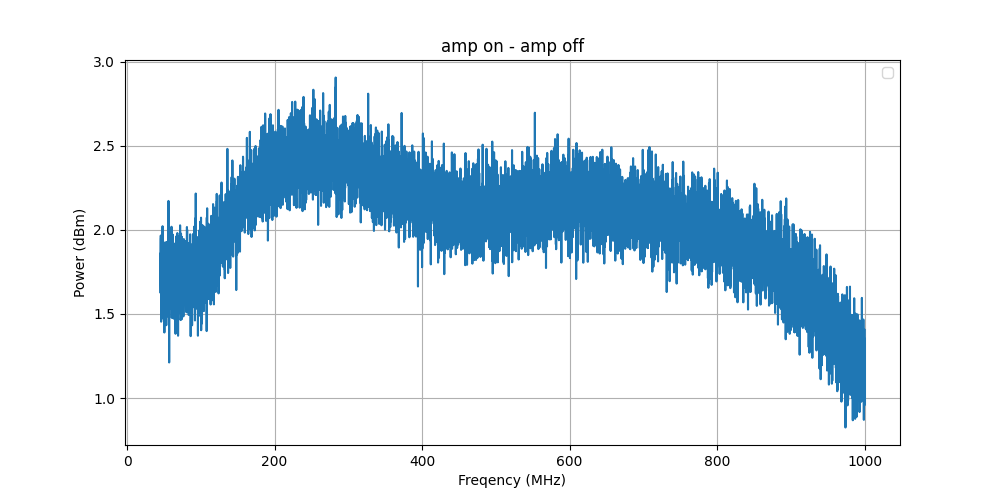

In [6]:
ampOn       = np.load('data/ampMc_input_ampOn_RBW100k_freq45_1005MHz_8_11_23.npy')[:,1]
ampOff      = np.load('data/ampMc_input_ampOff_RBW100k_freq45_1005MHz_8_11_23.npy')[:,1]
pnackAmpOff = np.load('data/ampMc_input_ampOff_RBW100k_freq45_1005MHz_8_11_23.npy')[:,1]
term        = np.load('data/term_RBW100k_freq45_1005MHz_8_11_23.npy')[:,1]
open        = np.load('data/open_RBW100k_freq45_1005MHz_8_11_23.npy')[:,1]
short        = np.load('data/short_RBW100k_freq45_1005MHz_8_11_23.npy')[:,1]



plt.close('all')
plt.figure(figsize=(10,5))
plt.plot(freqs, ampOn, label = 'amp on')
plt.plot(freqs, ampOff, label = 'amp off', alpha = 1)
plt.plot(freqs, term, label = 'term', alpha = 1)
plt.plot(freqs, open, label = 'open', alpha = 1)
plt.plot(freqs, short, label = 'short', alpha = 1)
plt.legend()
plt.xlabel('Freqency (MHz)')
plt.ylabel('Power (dBm)')
plt.grid()
plt.show()



plt.figure(figsize=(10,5))
plt.plot(freqs, TG_off)
plt.plot(freqs, term, label = 'term', alpha = 1)
plt.plot(freqs, open, label = 'open', alpha = 1)
plt.plot(freqs, short, label = 'short', alpha = 1)
plt.legend()
plt.xlabel('Freqency (MHz)')
plt.ylabel('Power (dBm)')
plt.grid()
plt.show()


plt.figure(figsize=(10,5))
plt.title('amp on - amp off')
plt.plot(freqs, ampOn-ampOff)
plt.legend()
plt.xlabel('Freqency (MHz)')
plt.ylabel('Power (dBm)')
plt.grid()
plt.show()

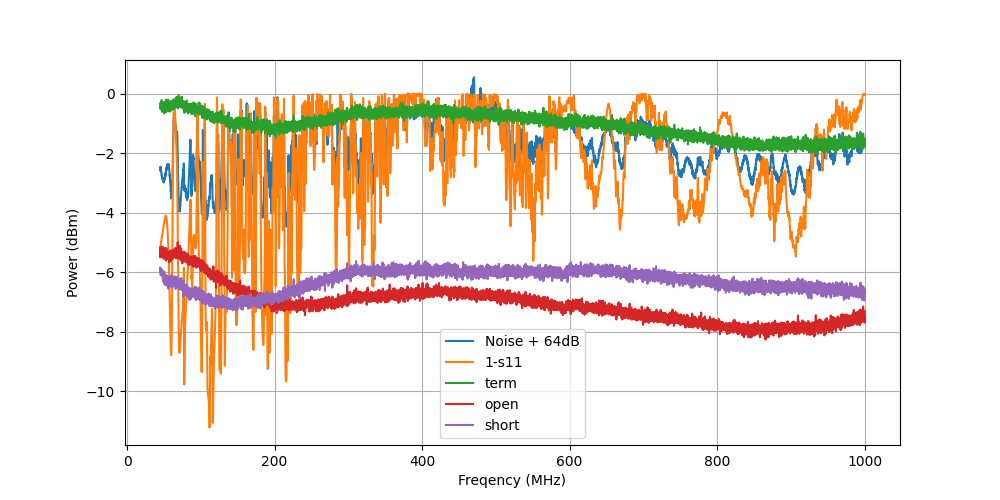

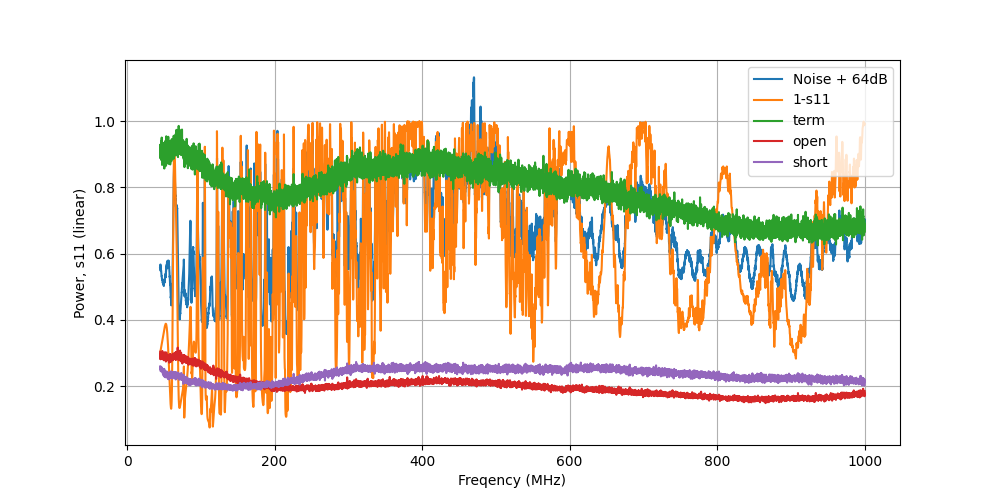

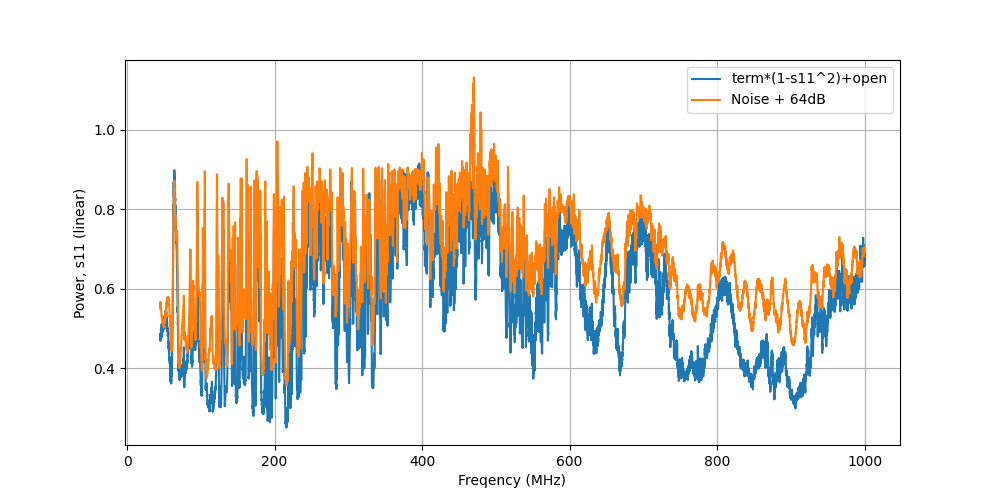

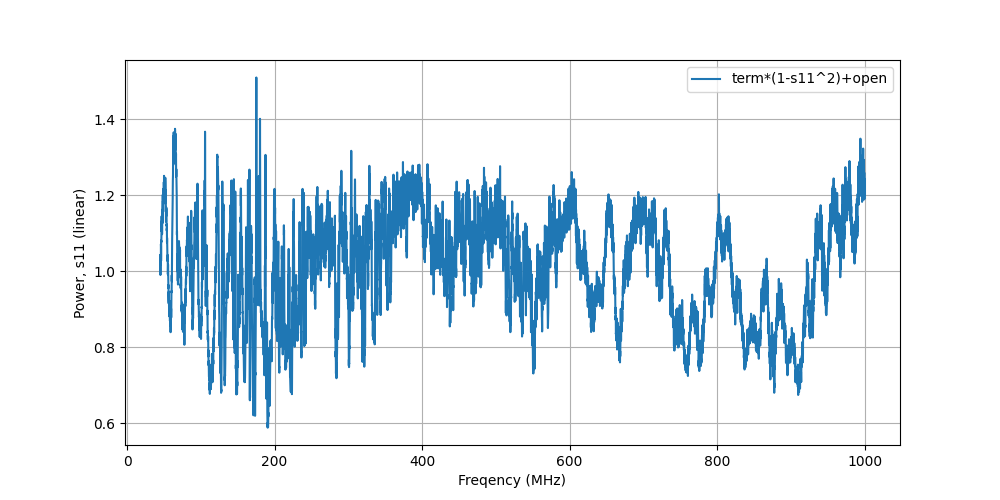

In [8]:
plt.close('all')
plt.figure(figsize=(10,5))
plt.plot(freqs, TG_off+60, label = 'Noise + 64dB')
#plt.plot(freqs, -s11_mag_interp, label = '1/s11')
plt.plot(freqs, 10*np.log10(1-(10**((s11_mag_interp)/20))**2), label = '1-s11')
plt.plot(freqs, term+60, label = 'term', alpha = 1)
plt.plot(freqs, open+60, label = 'open', alpha = 1)
plt.plot(freqs, short+60, label = 'short', alpha = 1)
plt.legend()
plt.xlabel('Freqency (MHz)')
plt.ylabel('Power (dBm)')
plt.grid()
plt.show()


plt.figure(figsize=(10,5))
plt.plot(freqs, 10**((TG_off+60)/10), label = 'Noise + 64dB')
#plt.plot(freqs, -s11_mag_interp, label = '1/s11')
plt.plot(freqs,(1-(10**((s11_mag_interp)/20))**2), label = '1-s11')
plt.plot(freqs, 10**((term+60)/10), label = 'term', alpha = 1)
plt.plot(freqs, 10**((open+60)/10), label = 'open', alpha = 1)
plt.plot(freqs, 10**((short+60)/10), label = 'short', alpha = 1)
plt.legend()
plt.xlabel('Freqency (MHz)')
plt.ylabel('Power, s11 (linear)')
plt.grid()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(freqs, ((10**((term+60)/10)-10**((open+60)/10))*(1-(10**((s11_mag_interp)/20))**2))+10**((open+60)/10), label = 'term*(1-s11^2)+open')
plt.plot(freqs, 10**((TG_off+60)/10), label = 'Noise + 64dB')
#plt.plot(freqs, -s11_mag_interp, label = '1/s11')
#plt.plot(freqs,(1-(10**((s11_mag_interp)/20))**2), label = '1-s11')
#plt.plot(freqs, 10**((term+60)/10), label = 'term', alpha = 1)
#plt.plot(freqs, 10**((open+60)/10), label = 'open', alpha = 1)
#plt.plot(freqs, 10**((short+60)/10), label = 'short', alpha = 1)
plt.legend()
plt.xlabel('Freqency (MHz)')
plt.ylabel('Power, s11 (linear)')
plt.grid()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(freqs, ((10**((term+60)/10)*(1-(10**((s11_mag_interp)/20))**2))+10**((open+60)/10))/10**((TG_off+60)/10), label = 'term*(1-s11^2)+open')
plt.legend()
plt.xlabel('Freqency (MHz)')
plt.ylabel('Power, s11 (linear)')
plt.grid()
plt.show()

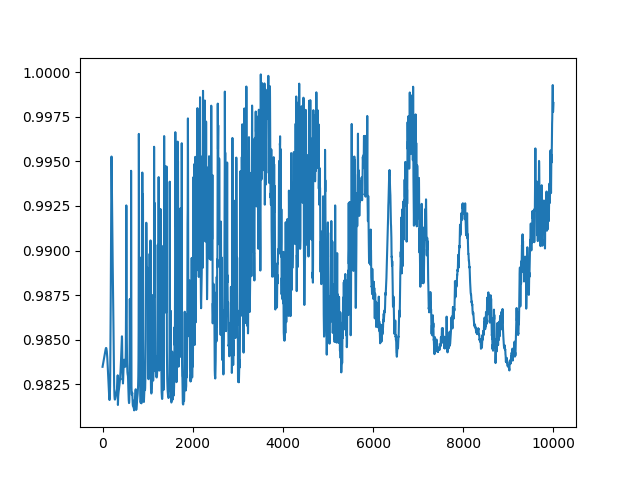

In [10]:

MNEW = (1-s11_ant_lin**2)*(1-s11_sys**2)/(1-((s11_ant_lin**2)*(s11_sys**2)))**2

MOLD = (1-s11_ant_lin**2)*(1-s11_sys**2)/(1-s11_ant_lin*s11_sys)**2

plt.close('all')
plt.figure()
plt.plot(MNEW/MOLD)
#plt.plot(MNEW)
#plt.plot(MOLD)

In [ ]:
s11_ant_lin     =10**((s11_mag_interp)/20)
s11_sys         = 0.01

#M              = (1-s11_ant_lin)**2

M = (1-s11_ant_lin**2)*(1-s11_sys**2)/(1-s11_ant_lin**2*s11_sys**2)**2
#M = (1-s11_ant_lin**2)*(1-s11_sys**2)


term_lin    = 10**((term+60)/10)
open_lin    = 10**((open+60)/10)
short_lin   = 10**((short+60)/10)
ant_noise   = 10**((TG_off-50)/10)



plt.close('all')
plt.figure(figsize=(10,5))
plt.title('Noise vs kT_rG(M+1/3)')
plt.plot(freqs, ant_noise, label = 'Noise')
#plt.plot(freqs, 3.98e-21*10**9.23*(M+(1/3)), label = 'M')
plt.plot(freqs, 3.98e-21*10**9.23*(MCable+(1/3)), label = 'M')
plt.legend()
plt.xlabel('Freqency (MHz)')
plt.ylabel('Power, s11 (linear)')
plt.grid()
plt.show()

plt.figure(figsize=(10,5))
plt.title('Noise vs kT_rG(M+1/3)')
plt.plot(freqs, ant_noise/(3.98e-21*10**9.23*(M+(1/3))), label = 'Noise')
plt.legend()
plt.xlabel('Freqency (MHz)')
plt.ylabel('Power, s11 (linear)')
plt.grid()
plt.show()

'''
plt.figure(figsize=(10,5))
plt.title('')
plt.plot(freqs, ant_noise, label = 'Noise')
plt.plot(freqs ,M, label = 'M')

plt.legend()
plt.xlabel('Freqency (MHz)')
plt.ylabel('Power, s11 (linear)')
plt.grid()
plt.show()


plt.figure(figsize=(10,5))
plt.title('everything linear')
plt.plot(freqs, (ant_noise-open_lin)/M, label = '(ant-open)/M')
plt.plot(freqs, (term_lin-open_lin), label = '(ant-open)/M')
plt.legend()
plt.xlabel('Freqency (MHz)')
plt.ylabel('Power, s11 (linear)')
plt.grid()
plt.show()

plt.figure(figsize=(10,5))
plt.title('everything linear')
plt.plot(freqs, (term_lin-open_lin)*M, label = '(term-open)*M')
plt.plot(freqs, ant_noise-open_lin, label = 'ant-open')
plt.legend()
plt.xlabel('Freqency (MHz)')
plt.ylabel('Power, s11 (linear)')
plt.grid()
plt.show()

plt.figure(figsize=(10,5))
plt.title('')
plt.plot(freqs, 10*np.log10((term_lin-open_lin)*M), label = '(term-open)*M')
plt.plot(freqs, 10*np.log10(ant_noise-open_lin), label = 'ant-open')
plt.legend()
plt.xlabel('Freqency (MHz)')
plt.ylabel('Power, s11 (dB)')
plt.grid()
plt.show()


plt.figure(figsize=(10,5))
plt.title('everything linear')
plt.plot(freqs, ((term_lin-open_lin)*M)/(ant_noise-open_lin), label = '((term-open)*M)/(ant-open)')
plt.legend()
plt.xlabel('Freqency (MHz)')
plt.ylabel('Power, s11 (linear)')
plt.grid()
plt.show()'''

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lti, chirp, lsim
from scipy.signal import iirnotch, freqz

# Notch filter parameters
f0 = 1.0  # Notch frequency
Q = 30.0  # Quality factor

# Create a notch filter
b, a = iirnotch(f0, Q, fs=1/dt)

# Create an LTI system for the notch filter
notch_system = lti(b, a)


# Define the resonant system parameters (second-order system)
wn = 2 * np.pi * 1.0  # Natural frequency (1 Hz)
zeta = 0.0005           # Damping ratio
numerator = [wn**2]
denominator = [1, 2 * zeta * wn, wn**2]

# Create a Linear Time-Invariant (LTI) system
system = lti(numerator, denominator)

# Time vector
t = np.linspace(0, 10000, 100000)
dt = t[1] - t[0]

# Create a chirp signal
chirp_signal = chirp(t, f0=0.5, f1=1.5, t1=10000, method='linear')

# Create white noise
noise_signal = np.random.normal(0, 1, len(t))

if 1: # band pass
    _, chirp_response, _ = lsim(system, chirp_signal, t)

    # Simulate the response to the noise
    _, noise_response, _ = lsim(system, noise_signal, t)

if 0: #notch
    _, chirp_response, _ = lsim(notch_system, chirp_signal, t)

    # Simulate the response to the noise
    _, noise_response, _ = lsim(notch_system, noise_signal, t)

# Plot the responses
plt.close('all')

plt.figure()
plt.plot(t, (chirp_response), label='Response to Chirp')
plt.plot(t, (noise_response), label='Response to White Noise')

plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

# Plot the responses
plt.figure()
plt.plot(t, noise_signal, label='Noise Input')
plt.plot(t, noise_response, label='Response to White Noise')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


In [ ]:
from scipy.fft import fft

# Compute FFT of the input (chirp and noise) and output signals
fft_chirp_input = fft(chirp_signal)
fft_noise_input = fft(noise_signal)
fft_chirp_output = fft(chirp_response)
fft_noise_output = fft(noise_response)

# Compute the frequency response (ratio of output to input)
freq_response_chirp = fft_chirp_output / fft_chirp_input
freq_response_noise = fft_noise_output / fft_noise_input

# Generate frequency axis
frequency = np.fft.fftfreq(t.size, dt)

plt.close('all')
# Plot the magnitude of the frequency response
plt.figure()
plt.plot(frequency, 10*np.log10(np.abs(fft_chirp_input)), label='Chirp Input')
plt.plot(frequency, 10*np.log10(np.abs(fft_chirp_output)), label='Chirp Output')
plt.title('Magnitude of Frequency Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.legend()
plt.grid()
plt.xlim([0, 2]) # Limiting to a reasonable frequency range


# Plot the magnitude of the frequency response
plt.figure()
plt.plot(frequency, 10*np.log10(np.abs(fft_noise_input)), label='Noise Input')
plt.plot(frequency, 10*np.log10(np.abs(fft_noise_output)), label='Noise Output')
plt.title('Magnitude of Frequency Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.legend()
plt.grid()
plt.xlim([0, 2]) # Limiting to a reasonable frequency range

'''# Plot the phase of the frequency response
plt.figure()
plt.plot(frequency, np.angle(freq_response_chirp), label='Chirp')
plt.plot(frequency, np.angle(freq_response_noise), label='Noise')
plt.title('Phase of Frequency Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (radians)')
plt.legend()
plt.grid()
plt.xlim([0, 2]) # Limiting to a reasonable frequency range
plt.tight_layout()
plt.show()'''


In [ ]:
import scipy.signal
plt.close('all')
plt.figure()
plt.plot(freqs, TG_off)
plt.figure()
#auto corrolation
plt.plot(10*np.log10(scipy.signal.correlate(TG_off, TG_off)[len(TG_off)-1:] ))

#fft
plt.figure()
plt.plot(np.abs(np.fft.fft(TG_off[7000:])**2)[1:])

In [ ]:
freqs   = np.load('data/TG_off_RBW10k_10dBatt_8_9_23.npy')[:, 0]/1e6
TG_off  = np.load('data/noDrive_RBW10k_freq45_1005MHz_8_17_23.npy')[:, 1] 
TG_on   = np.load('data/tgDrive_n40dBm_RBW10k_freq45_1005MHz_8_17_23.npy')[:, 1] 
NS_on   = np.load('data/noiseDrive_n40dBm_RBW10k_freq45_1005MHz_8_17_23.npy')[:, 1]
nFloor  = np.load('data/rigolNoiseFloor_ampOff_RBW10k_freq45_1005MHz_8_17_23.npy')[:, 1] 

plt.close('all')
plt.figure()
plt.plot(freqs, TG_off)
plt.plot(freqs, TG_on)
plt.plot(freqs, NS_on)
plt.plot(freqs, nFloor)